In [1]:
import numpy as np 
np.random.seed(0)


In [2]:
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X,y = spiral_data(100,3)

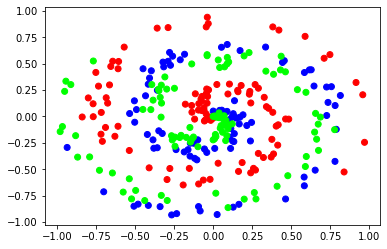

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap="brg")
plt.show()

In [5]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # No need to do transpose
        self.biases = np.zeros((1, n_neurons)) #if the network is dying because of many zeroes we can adjust this to non zero numbers
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [6]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        negative_log = -np.log(correct_confidences)
        return negative_log

In [7]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output)

[[0.33333333 0.33333333 0.33333333]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341967]
 [0.33325941 0.33326395 0.33347665]
 [0.33323311 0.33323926 0.33352763]
 [0.33328417 0.33328719 0.33342864]
 [0.33318217 0.33319145 0.33362638]
 [0.33318279 0.33319203 0.33362518]
 [0.33314924 0.33316055 0.33369021]
 [0.33310588 0.33311984 0.33377428]
 [0.33308134 0.3330968  0.33382186]
 [0.33311025 0.33312502 0.33376474]
 [0.33305368 0.33307084 0.33387547]
 [0.33300948 0.33302935 0.33396117]
 [0.33301342 0.33303305 0.33395353]
 [0.33299847 0.33301902 0.33398251]
 [0.33312676 0.33318864 0.3336846 ]
 [0.33294092 0.33296499 0.3340941 ]
 [0.3329943  0.33303145 0.33397426]
 [0.33287369 0.33290187 0.33422444]
 [0.33287569 0.33290376 0.33422055]
 [0.3330955  0.33318355 0.33372095]
 [0.33317605 0.33328284 0.33354112]
 [0.33289398 0.33293875 0.33416727]
 [0.33256376 0.33270203 0.3347342 ]
 [0.33281362 0.33284548 0.3343409 ]
 [0.33314454 0.33327037 0.33358509]
 [0.33312851 0.333258   0.33

In [8]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

print("Loss:", loss)

Loss: 1.0984449588022467


In [9]:
predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)

print("acc: ", accuracy)

acc:  0.34
